<a href="https://colab.research.google.com/github/HeshamAhmedd/Build_Simple_NN_on_FashionMNIST/blob/main/Simple_NN_on_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1️⃣ Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import seaborn as sns

In [2]:
# ================================================================
# 2️⃣ Dataset Loading and Preprocessing
# ================================================================
transform = transforms.Compose([
    transforms.ToTensor(),                 # Convert image to tensor
    transforms.Normalize((0.5,), (0.5,))   # Normalize to [-1, 1]
])

train_dataset = torchvision.datasets.FashionMNIST(
    root="./data", train=True, transform=transform, download=True
)
test_dataset = torchvision.datasets.FashionMNIST(
    root="./data", train=False, transform=transform, download=True
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


100%|██████████| 26.4M/26.4M [00:01<00:00, 15.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 272kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.90MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 18.3MB/s]


In [3]:
# ================================================================
# 3️⃣ Define the Neural Network
# ================================================================
class FashionNN(nn.Module):
    def __init__(self):
        super(FashionNN, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),                 # 28x28 -> 784
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)            # 10 classes
        )

    def forward(self, x):
        return self.model(x)


In [4]:
# ================================================================
# 4️⃣ Initialize Model, Loss, and Optimizer
# ================================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FashionNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
# ================================================================
# 5️⃣ Training Loop
# ================================================================
epochs = 10
train_losses, test_losses, train_accs, test_accs = [], [], [], []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    # ===== Evaluate on Test Set =====
    model.eval()
    test_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()
    test_loss /= len(test_loader)
    test_acc = 100 * correct / total
    test_losses.append(test_loss)
    test_accs.append(test_acc)

    print(f"Epoch [{epoch+1}/{epochs}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")


Epoch [1/10] Train Loss: 0.3186, Train Acc: 88.28% | Test Loss: 0.3488, Test Acc: 87.07%
Epoch [2/10] Train Loss: 0.2989, Train Acc: 88.88% | Test Loss: 0.3620, Test Acc: 86.97%
Epoch [3/10] Train Loss: 0.2790, Train Acc: 89.66% | Test Loss: 0.3502, Test Acc: 87.67%
Epoch [4/10] Train Loss: 0.2624, Train Acc: 90.20% | Test Loss: 0.3451, Test Acc: 87.88%
Epoch [5/10] Train Loss: 0.2513, Train Acc: 90.57% | Test Loss: 0.3392, Test Acc: 88.13%
Epoch [6/10] Train Loss: 0.2383, Train Acc: 91.05% | Test Loss: 0.3500, Test Acc: 87.67%
Epoch [7/10] Train Loss: 0.2267, Train Acc: 91.50% | Test Loss: 0.3382, Test Acc: 88.23%
Epoch [8/10] Train Loss: 0.2153, Train Acc: 91.84% | Test Loss: 0.3358, Test Acc: 88.80%
Epoch [9/10] Train Loss: 0.2049, Train Acc: 92.30% | Test Loss: 0.3467, Test Acc: 88.46%
Epoch [10/10] Train Loss: 0.1953, Train Acc: 92.63% | Test Loss: 0.3545, Test Acc: 88.04%


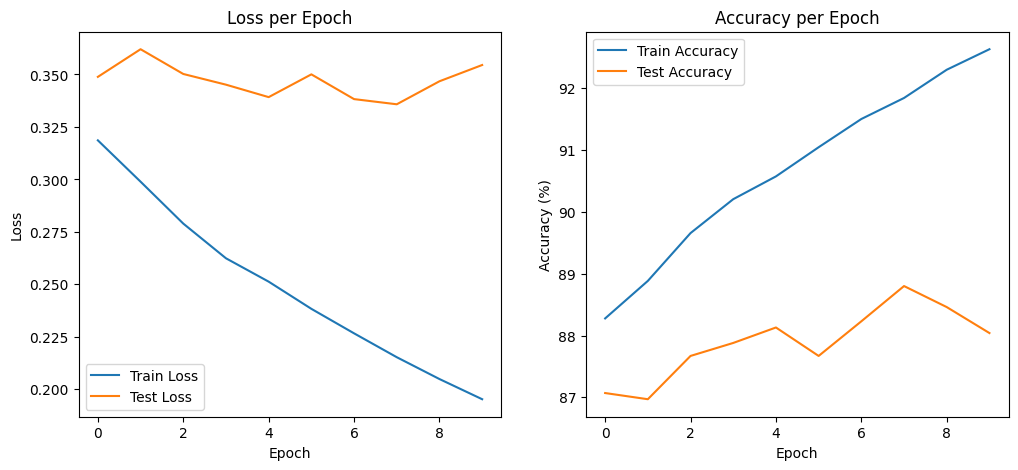

In [7]:
# ================================================================
# 6️⃣ Plot Loss and Accuracy per Epoch
# ================================================================
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(test_accs, label='Test Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


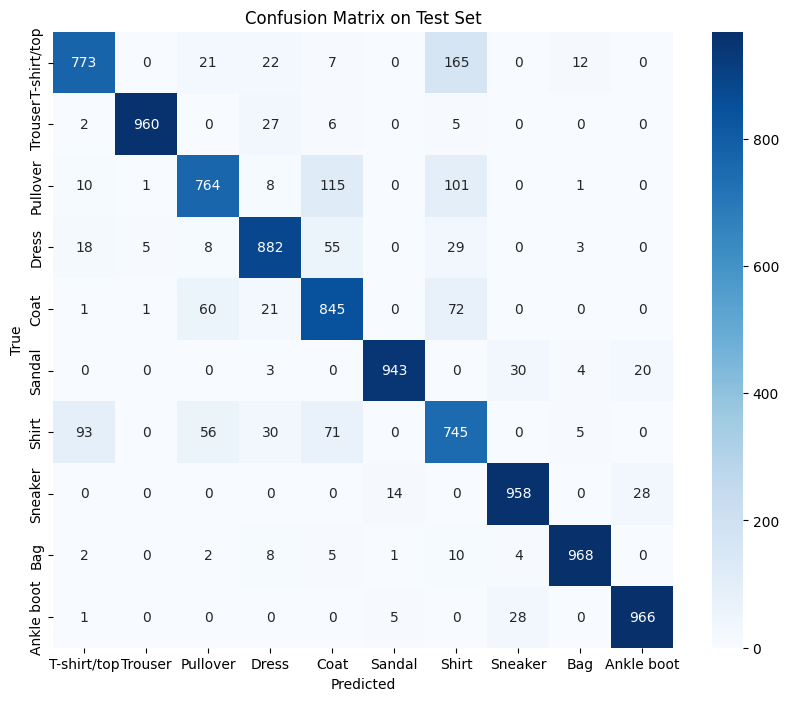

In [8]:
# ================================================================
# 7️⃣ Confusion Matrix
# ================================================================
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix on Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

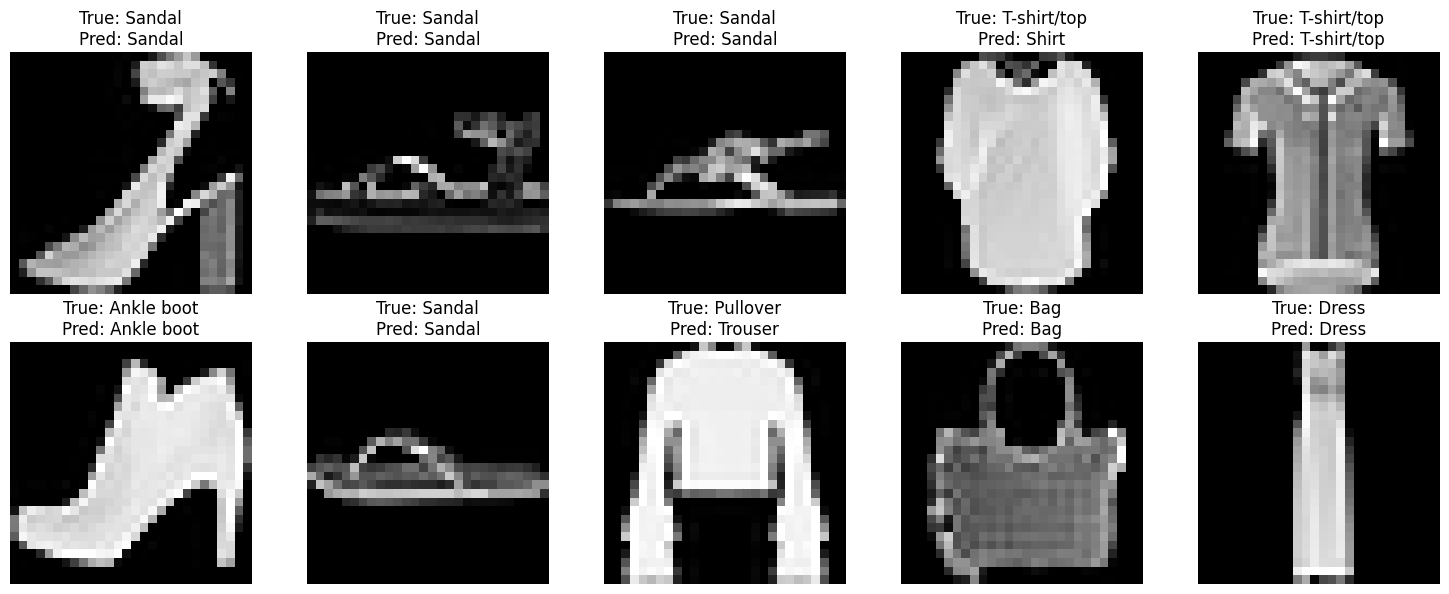

In [9]:
# ================================================================
# 8️⃣ Show Example Predictions
# ================================================================
def show_predictions(model, dataset, n=10):
    model.eval()
    fig, axes = plt.subplots(2, n//2, figsize=(15,6))
    axes = axes.flatten()
    for i in range(n):
        idx = np.random.randint(0, len(dataset))
        image, label = dataset[idx]
        with torch.no_grad():
            output = model(image.unsqueeze(0).to(device))
            _, pred = torch.max(output, 1)
        axes[i].imshow(image.squeeze(), cmap='gray')
        axes[i].set_title(f"True: {classes[label]}\nPred: {classes[pred]}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

show_predictions(model, test_dataset, n=10)

In [10]:
# ================================================================
# 9️⃣ Conclusion
# ================================================================
print("\n=== Conclusion ===")
print(f"Final Training Accuracy: {train_accs[-1]:.2f}%")
print(f"Final Test Accuracy: {test_accs[-1]:.2f}%")
print("The model successfully classifies Fashion-MNIST items with accuracy above 85%.")
print("It performs best on distinct classes like 'Sneakers' and 'Bags',")
print("and slightly worse on similar ones like 'Shirt' vs 'T-shirt/top'.")


=== Conclusion ===
Final Training Accuracy: 92.63%
Final Test Accuracy: 88.04%
The model successfully classifies Fashion-MNIST items with accuracy above 85%.
It performs best on distinct classes like 'Sneakers' and 'Bags',
and slightly worse on similar ones like 'Shirt' vs 'T-shirt/top'.
